# Homework 04

**Bernard Mwamburi**

# Preparing the Environment

Use the cell below to import NumPy, Pandas, and the Pyplot library of Matplotlib, using the standard aliases. 

Also import the following tools from Scikit-Learn: `LogisticRegresion`, `DecisionTreeClassifier`, `RandomForestClassifier`, `KNeighborsClassifier`, `GridSearchCV`, `cross_val_score`, `cross_val_predict`, `classification_report`, and `confusion_matrix`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

Run the cell below to suppress scientific notation for NumPy arrays. 

In [2]:
np.set_printoptions(suppress=True)

# Part 1: Load and Explore Data

In this assignment, you will be working with the MNIST dataset. This dataset consists of several thousand black-and-white images of handwritten digits from 0 - 9. Your goal will be to create a model capable of identifying the digit displayed in an image based on the values of pixels within the image. 

You can learn more about this dataset here: https://www.kaggle.com/c/digit-recognizer

The images in the dataset are 28x28 black-and-white images. As such, each image contains 784 pixel values. These pixel values are represented as integers ranging from 0 to 255. Rather than working with image files, you will be provided with CSV files that contain the pixel values. Each row in the CSV files will contain the pixel values for a single image. 

**1A.** Use the cell below to load the dataset `digit-recognizer/train.csv` into a DataFrame. Shuffle the DataFrame (setting `random_state=1`), print its shape, and then display the head of the DataFrame. 

In [3]:
# 1A
train = pd.read_csv('train.csv')
train = train.sample(frac = 1, random_state=1)
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
29633,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
345,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36369,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16624,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14389,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This dataset is relatively large. For the sake of reducing runtime of this notebook, we will use only 10,000 observations when performing hyperparameter tuning and model selection. 

**1B**. Create a DataFrame named `df_sample` that contains 10,000 rows sampled at random from the DataFrame created in the previous cell. Set `random_state=1` when performing the sampling. Print the shape of the new DataFrame. 

In [4]:
# 1B
df_sample = train.sample(n=10000, random_state=1)
print(df_sample.shape)

(10000, 785)


**1C.** Create feature and label arrays named `X_sample` and `y_sample`. Use only the 10,000 observations from the sample. Print the shape of both arrays. 

In [5]:
# 1C
X_sample = df_sample.drop(columns = 'label', inplace=False).values
y_sample = df_sample.label.values

print(f"""
Shape of feature array: {X_sample.shape}
Shape of target array:  {y_sample.shape}
""")


Shape of feature array: (10000, 784)
Shape of target array:  (10000,)



**1D.** Run the code below as is. The code below creates a 2x4 grid of subplots displaying the first 8 digits in the sample, and also prints the labels for these observations. Note that the rows are reshaped into 28x28 arrays in order to be displayed as images. 

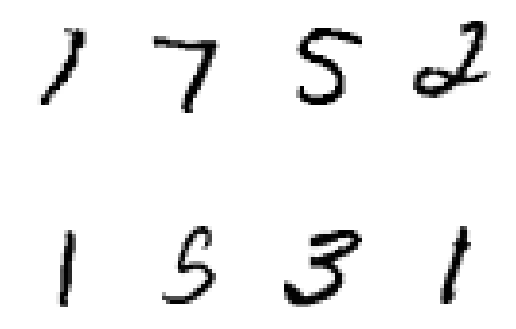

[1 7 5 2 1 5 3 1]


In [6]:
# 1D
for i in range(8):
    plt.subplot(2,4,i+1)
    digit = X_sample[i,:].reshape(28,28)
    plt.imshow(digit, cmap='Greys')
    plt.axis('off')
plt.show()

print(y_sample[:8])

**1E.** Some of our algorithms will have better performance if we scale the pixel values. Since we know the pixel values all range from 0 to 255, we will simply divide the feature array by 255 to get a scaled feature array with values between 0 and 1. Perform this task in the next cell and name the scaled feature array `X_scaled`. 

In [7]:
# 1E
X_scaled = X_sample/255

# Part 2: Model Selection

We will now perform model selection and hyperparameter tuning. For this assignment, you will consider logistic regression, decision tree, random forest, and KNN models. 

**IMPORTANT NOTE:** For the sake of time, we will be using **5-fold** cross-validation throughout Part 2, rather than 10-fold cross-validation. 

### Logistic Regression

**2A.** In the cell below, create a logistic regression model, setting `penalty='none'`, `solver='saga'`, and `tol=0.01`. The last two parameters are set to help with convergence. Estimate the model's out-of-sample accuracy using **5-fold** cross validation. Print the result rounded to 4 decimal places in a message of the following form: 

    CV Score: ____

You might need to adjust the max_iter parameter of your model to avoid convergence warnings. Note that you are not asked to actually fit a model on the full dataset at this point.

In [8]:
%%time 
# 2A
lr_mod = LogisticRegression(penalty='none', solver = 'saga',tol=0.01, max_iter=1000)
cv_score = cross_val_score(lr_mod, X_scaled, y_sample, cv=5).mean()

print(f"CV Score: {np.round(cv_score, 4)}")

C:\Users\MRT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\MRT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\MRT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\MRT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\MRT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.

CV Score: 0.9064
CPU times: total: 1min 6s
Wall time: 1min 8s


### K-Nearest Neighbors

**2B.** Use `GridSearchCV` to perform hyperparameter tuning for KNN models, according to the following specifications:
* Tune over the `n_neighbors` parameter, considering at least 8 values for this parameter. 
* Adjust the list of hyperparameter values as needed in order to find the best possible value. 
* Name your `GridSearchCV` object `knn_grid` to be consistent with code provided in the next step.
* Use the scaled sample data. 
* Use **5-fold** cross_validation. 
* Use the `best_estimator_` attribute to extract the best model found. 
* Summarize your results by printing messages of the type shown below, with numerical values rounded to four decimal places.

```
Best Parameters: ____
Best CV Score:   ____
Training Acc:    ____
```

In [9]:
%%time 
# 2B
knn_clf = KNeighborsClassifier()

knn_parameters = {
    'n_neighbors': list(range(2,20,2)),
}

knn_grid = GridSearchCV(knn_clf, knn_parameters, cv=5, refit='True', n_jobs=-1)
knn_grid.fit(X_scaled, y_sample)

knn_mod = knn_grid.best_estimator_

print(f'''
Best Parameters: {knn_grid.best_params_}
Best CV Score:   {knn_grid.best_score_:.4f}
Training Acc:    {knn_mod.score(X_scaled, y_sample):.4f}
''')


Best Parameters: {'n_neighbors': 4}
Best CV Score:   0.9445
Training Acc:    0.9689

CPU times: total: 14.3 s
Wall time: 24.2 s


Run the cell below to visualize your grid search results. Based on these results, you might want to adjust the hyperparameter values considered above. Your plot should provide strong support for the claim that you have found the best hyperparameter value. 

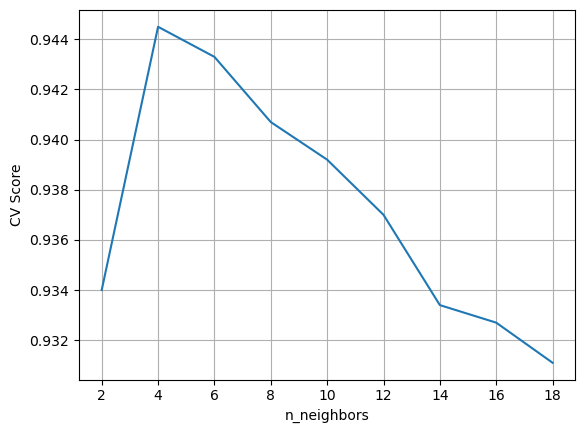

In [10]:
knn_summary = pd.DataFrame(knn_grid.cv_results_['params'])
knn_summary['cv_score'] = knn_grid.cv_results_['mean_test_score']

plt.plot(knn_summary.n_neighbors, knn_summary.cv_score)
plt.xlabel('n_neighbors')
plt.ylabel('CV Score')
plt.xticks(knn_summary.n_neighbors)
plt.grid()
plt.show()

### Decision Trees

**2C.** Use `GridSearchCV` to perform hyperparameter tuning for decision tree models, according to the following specifications:
* Set `random_state=1` for your model.
* Tune over the `max_depth` and `min_samples_leaf` parameters. 
* Considering at least 6 values for `max_depth` and at least 4 values for `min_samples_leaf`. 
* Adjust the list of hyperparameter values as needed in order to find a parameter set that is at least close to the best possible.
* Name your `GridSearchCV` object `dt_grid` to be consistent with code provided in the next step.
* Use the scaled sample data. 
* Use **5-fold** cross_validation. 
* Use the `best_estimator_` attribute to extract the best model found.
* Summarize your results by printing messages of the type shown below, with numerical values rounded to four decimal places.

```
Best Parameters: ____
Best CV Score:   ____
Training Acc:    ____
```

In [11]:
%%time 

dt_clf = DecisionTreeClassifier(random_state=1)

dt_parameters = {
    'max_depth': [2, 4, 6, 8, 10, 12],
    'min_samples_leaf': [1, 2, 4, 8]
}

dt_grid = GridSearchCV(dt_clf, dt_parameters, cv=10, refit='True', n_jobs=-1)
dt_grid.fit(X_scaled, y_sample)

dt_mod = dt_grid.best_estimator_

print(f'''
Best Parameters: {dt_grid.best_params_}
Best CV Score:   {dt_grid.best_score_:.4f}
Training Acc:    {dt_mod.score(X_scaled, y_sample):.4f}
''')


Best Parameters: {'max_depth': 12, 'min_samples_leaf': 1}
Best CV Score:   0.8074
Training Acc:    0.9717

CPU times: total: 2.3 s
Wall time: 1min 19s


Run the cell below to visualize your grid search results. Based on these results, you might want to adjust the hyperparameter values considered above. Your plot should provide strong support for the claim that you have found the best set of hyperparameter values (or at least something close to it).

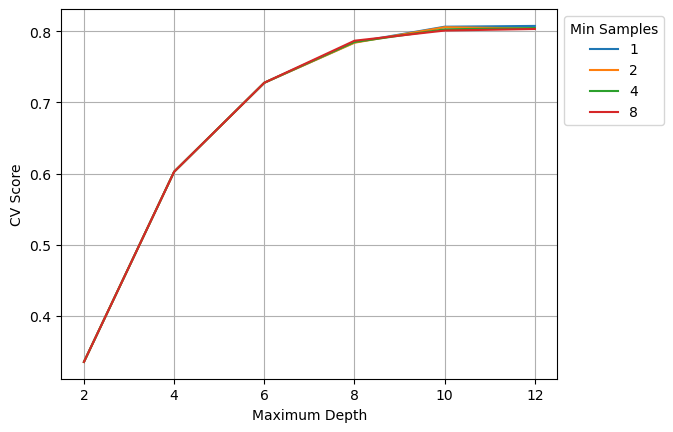

In [12]:
dt_summary = pd.DataFrame(dt_grid.cv_results_['params'])
dt_summary['cv_score'] = dt_grid.cv_results_['mean_test_score']

for ms in dt_parameters['min_samples_leaf']:
    temp = dt_summary.query(f'min_samples_leaf == {ms}')
    plt.plot(temp.max_depth, temp.cv_score, label=ms)
plt.xlabel('Maximum Depth')
plt.ylabel('CV Score')
plt.legend(title='Min Samples', bbox_to_anchor=[1,1])
plt.xticks(dt_parameters['max_depth'])
plt.grid()
plt.show()

### Random Forests

**2D.** Use `GridSearchCV` to perform hyperparameter tuning for random forest models, according to the following specifications:
* Set `random_state=1` for your model.
* Use 100 trees in your forest. 
* Tune over the `max_depth` and `min_samples_leaf` parameters. 
* Considering at least 6 values for `max_depth` and at least 3 values for `min_samples_leaf`. 
* Adjust the list of hyperparameter values as needed in order to find a parameter set that is at least close to the best possible.
* Name your `GridSearchCV` object `rf_grid` to be consistent with code provided in the next step.
* Use the scaled sample data. 
* Use **5-fold** cross_validation. 
* Use the `best_estimator_` attribute to extract the best model found.
* Summarize your results by printing messages of the type shown below, with numerical values rounded to four decimal places.

```
Best Parameters: ____
Best CV Score:   ____
Training Acc:    ____

In [13]:
%%time 

rf_clf = RandomForestClassifier(n_estimators=100, random_state=1)

rf_parameters = {
    'max_depth': list(range(2, 18 ,2)),
    'min_samples_leaf': list(range(1, 5))
}

rf_grid = GridSearchCV(rf_clf, rf_parameters, cv=5, refit='True', n_jobs=-1)
rf_grid.fit(X_scaled, y_sample)

rf_mod = rf_grid.best_estimator_

print(f'''
Best Parameters: {rf_grid.best_params_}
Best CV Score:   {rf_grid.best_score_:.4f}
Training Acc:    {rf_grid.score(X_scaled, y_sample):.4f}
''')


Best Parameters: {'max_depth': 16, 'min_samples_leaf': 1}
Best CV Score:   0.9471
Training Acc:    0.9998

CPU times: total: 7.64 s
Wall time: 3min 19s


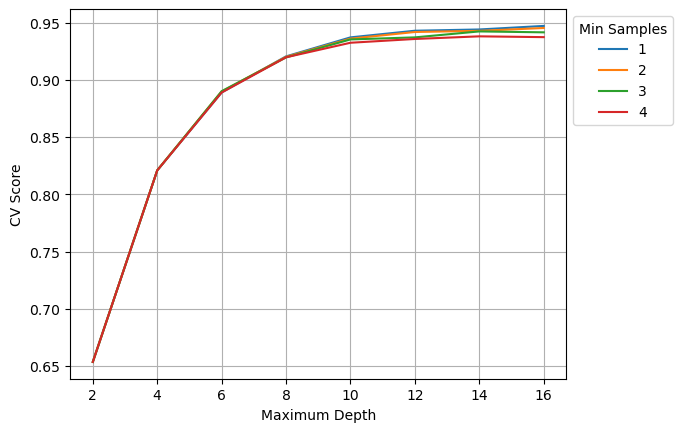

In [14]:
rf_summary = pd.DataFrame(rf_grid.cv_results_['params'])
rf_summary['cv_score'] = rf_grid.cv_results_['mean_test_score']

for ms in rf_parameters['min_samples_leaf']:
    temp = rf_summary.query(f'min_samples_leaf == {ms}')
    plt.plot(temp.max_depth, temp.cv_score, label=ms)
plt.xlabel('Maximum Depth')
plt.ylabel('CV Score')
plt.legend(title='Min Samples', bbox_to_anchor=[1,1])
plt.xticks(rf_parameters['max_depth'])
plt.grid()
plt.show()

# Part 3: Final Model

In this part, you will identify, train, and evaluate your final model. For the sake of time, we only used 10,000 observations for hyperparameter tuning. However, in order to improve our model, we will train the our final model on the entire set of 42,000 observations. 

**3A.** In the cell below, create feature and label arrays using all of the observations from the original DataFrame. Scale the feature array by dividing the pixel values by 255. Then print the shape of the scaled feature array and the label array. 

In [15]:
# 3A
X = train.drop(columns = 'label', inplace=False).values
X = X/255
y = train.label.values

print(f"""
Shape of feature array: {X.shape}
Shape of target array:  {y.shape}
""")


Shape of feature array: (42000, 784)
Shape of target array:  (42000,)



Review the cross-validation scores for the models considered in Part 2 and identify the model with the highest CV score. If your best-performing model is a KNN model, and it is only slighlty better than another model, then select your second-best model instead. KNN models are are problematic with this dataset, for reasons discussed in class.  

**3B.** After identifying your final model, train a new version of this model using the best set of hyperparameter values found previously. If creating a decision tree or random forest model, set `random_state=1`. Then fit the model to the full dataset. Next, evaluate the final model by performing **10-fold** cross-validation. Print the result rounded to 4 decimal places in a message of the following form: 

    CV Score: ____
    
 **Note:** You are asked to use 10-fold CV here. 

In [16]:
%%time
# 3B
final_model = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=16, min_samples_leaf=1)
final_model.fit(X, y)

scores = cross_val_score(final_model, X, y, cv=10)
print(f"CV Score: {np.round(scores.mean(), 4)}")

CV Score: 0.9623
CPU times: total: 4min 28s
Wall time: 5min 30s


**3C.** Use 10-fold cross-validation prediction with your final model to generate out-of-sample predictions for the dataset. Use these predictions to generate a classification report. Display the report as a DataFrame. 

In [17]:
%%time
# 3C
cv_predict = cross_val_predict(final_model, X, y, cv=10)

cm = confusion_matrix(y, cv_predict)
pd.DataFrame(cm)

CPU times: total: 3min 59s
Wall time: 4min 32s


,0,1,2,3,4,5,6,7,8,9
0,4071,0,6,1,5,3,16,1,26,3
1,0,4607,22,16,9,4,7,9,5,5
2,13,13,4018,20,22,3,20,41,22,5
3,7,9,61,4093,2,63,10,35,45,26
4,6,5,5,0,3931,2,18,7,7,91
5,15,8,7,52,6,3633,27,2,22,23
6,22,6,3,0,11,25,4058,0,12,0
7,5,21,53,6,26,0,0,4221,9,60
8,9,29,17,37,20,26,17,7,3847,54
9,22,11,8,60,60,11,3,46,31,3936


**3D.** Edit this markdown cell to fill complete the statements below. Please remove the underscores replacing them with the correct values. 

* The 1st most common misclassification mode by the model was to classify the digit **4** as the digit **9**. 
* The 2nd most common misclassification mode by the model was to classify the digit **3** as the digit **5**. 

**3E.** Use the out-of-sample predictions to create and print a classification report. 

In [18]:
# 3E
print(classification_report(y, cv_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4132
           1       0.98      0.98      0.98      4684
           2       0.96      0.96      0.96      4177
           3       0.96      0.94      0.95      4351
           4       0.96      0.97      0.96      4072
           5       0.96      0.96      0.96      3795
           6       0.97      0.98      0.98      4137
           7       0.97      0.96      0.96      4401
           8       0.96      0.95      0.95      4063
           9       0.94      0.94      0.94      4188

    accuracy                           0.96     42000
   macro avg       0.96      0.96      0.96     42000
weighted avg       0.96      0.96      0.96     42000



# Part 4: New Observations

The csv file `digit-recognizer/test.csv` contains pixel values for 28,000 unlabeled images. 

**4A.** Load this csv file into a DataFrame. Then use the `sample()` method to select 16 rows at random, setting `random_state=4`. Create a feature array by extract the pixel values and dividing them by 255. Print the shape of the new feature array. 

In [19]:
# 4A
df_new = pd.read_csv('test.csv')
df_new = df_new.sample(16, random_state=4)
X_new = df_new.values / 255
print(X_new.shape)

(16, 784)


**4B**. Adapt the code form Part 1D to create a 4x4 grid of subplots displaying the 16 images in the sample of new observations. 

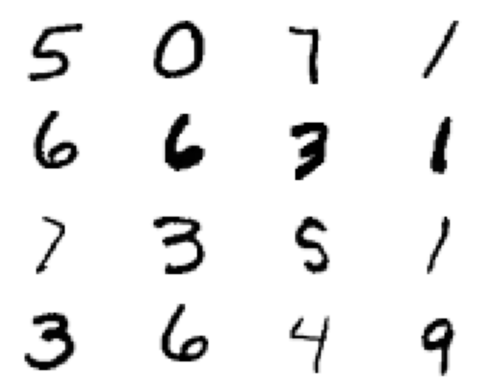

In [20]:
# 4B
for i in range(16):
    plt.subplot(4,4,i+1)
    digit = X_new[i,:].reshape(28,28)
    plt.imshow(digit, cmap='Greys')
    plt.axis('off')
plt.show()

**4C.** Generate class predictions for the 16 digits shown above. Print the predictions. To better compare the predictions with the digits, reshape the prediction array to a 4x4 array and then print this reshaped array. 

In [24]:
# 4C
predictions = final_model.predict(X_new)
np.reshape(predictions, (4,4))

array([[5, 0, 7, 1],
       [6, 6, 7, 1],
       [7, 3, 5, 1],
       [3, 6, 4, 9]], dtype=int64)

**4D.** For which, if any, of the 16 new observations did the model generate an incorrect prediction? Provide your answer in this mark-down cell by providing the indices (0 - 15) for the misclassified observations. 

Answer: **6**

**4E.** Use your final model to generate class probability estimates for the 16 new observations. Print the array of probability estimates rounded to 2 decimal places.

In [25]:
# 4E
pred_prob = final_model.predict_proba(X_new)
print(np.round(pred_prob, 2))

[[0.   0.   0.   0.02 0.01 0.95 0.   0.   0.01 0.01]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.14 0.02 0.08 0.01 0.   0.   0.72 0.   0.02]
 [0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.09 0.24 0.04 0.01 0.01 0.32 0.18 0.11]
 [0.   0.98 0.   0.   0.   0.   0.   0.   0.01 0.  ]
 [0.   0.2  0.3  0.09 0.   0.01 0.01 0.31 0.06 0.02]
 [0.01 0.   0.01 0.92 0.   0.06 0.   0.   0.   0.  ]
 [0.02 0.01 0.   0.12 0.05 0.52 0.01 0.   0.11 0.16]
 [0.   0.96 0.   0.   0.01 0.   0.   0.   0.02 0.  ]
 [0.   0.   0.   0.98 0.   0.02 0.   0.   0.   0.  ]
 [0.01 0.   0.   0.   0.02 0.   0.97 0.   0.   0.  ]
 [0.   0.01 0.   0.02 0.79 0.08 0.01 0.05 0.01 0.03]
 [0.   0.   0.   0.01 0.03 0.   0.   0.01 0.01 0.94]]


**4F.** Use the `max()` method with `axis=1` to determine the largest value in each row of the probability estimate array. Print these values rounded to 2 decimal places.

In [26]:
# 4F 
max_proba = np.max(pred_prob, axis=1)
print(np.round(max_proba, 2))

[0.95 1.   0.72 0.99 1.   1.   0.32 0.98 0.31 0.92 0.52 0.96 0.98 0.97
 0.79 0.94]


**4G.** Identify the three observations for which the model is the least confident in its prediction. Provide the indices (0-15) for these observations below, in increasing order of confidence. 

Answer: **8, 6, 10**